In [1]:
import gym
import rl_agents
import pprint
from rl_agents.agents.common.factory import load_agent, load_environment
from rl_agents.trainer.evaluation import Evaluation
from matplotlib import pyplot as plt

env_config = '../rl-agents/scripts/configs/HighwayEnv/env.json'
agent_config = '../rl-agents/scripts/configs/HighwayEnv/agents/DQNAgent/dqn.json'

env = load_environment(env_config)
env.configure({"offscreen_rendering": True})

c:\Users\bajs1\anaconda3\envs\highway_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\bajs1\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


# Test 1 - No vehicles, no change lane reward, 2 lanes.

Initially when training over 300 episodes I observed that the vehicle favored switching to the right lane and staying there. This makes sense as it does receive a small reward (0.1) for being in the right lane. However, when increasing the number of episodes up to 800 I no longer see this behavior... The vehicle now prefers staying in the leftmost lane, which is very strange. Does the agent loose too much speed when changing lanes? I do not know. But I reduced the number of training episodes back to 300.

In [6]:
def test1(env):
    env.config["lane_change_reward"] = 0
    env.config["vehicles_count"] = 0
    env.config["lanes_count"] = 2
    env.config["initial_lane_id"] = 0

    return env

# Test 2 - 3 vehicles, no change lane reward, 5 lanes
I observed similar behavior to the previous config, but it has also learned to avoid collisions with other cars.

In [5]:
def test2(env):
    env.config["lane_change_reward"] = 0
    env.config["vehicles_count"] = 3
    env.config["lanes_count"] = 5
    env.config["initial_lane_id"] = 0

    return env

# Test 3 - 3 vechicles, -0.1 change lane reward, 5 lanes
The car now oscilates between lanes if it does not have any other car in front of it. I suspect this is due to it receiving a negative reward during lane switch, and that it perhaps wants to come back to the previous state, but that instead gives it a negative reward, causing it to want to go back to the previous state, etc..

If however it encounters another car, it changes lanes regardless to avoid collision and prefers to then stay in the rightmost lane.

In [4]:
def test3(env):
    env.config["lane_change_reward"] = -0.1
    env.config["vehicles_count"] = 3
    env.config["lanes_count"] = 5
    env.config["initial_lane_id"] = 0

    return env

# Test 4 - 30 vehicles, -1 change lane reward, 5 lanes, 30 cars
Similar behavior to test 3. It does not prefer colliding over changing lanes, but can get stuck in oscilations.

In [7]:
def test4(env):
    env.config["lane_change_reward"] = -1
    env.config["vehicles_count"] = 30
    env.config["lanes_count"] = 5
    env.config["initial_lane_id"] = 0

    return env

# Test 5 - 30 vechicles, -10 change lane reward, 5 lanes.
Similar behavior to test 4 and 3.

In [8]:
def test5(env):
    env.config["lane_change_reward"] = -10
    env.config["vehicles_count"] = 30
    env.config["lanes_count"] = 5
    env.config["initial_lane_id"] = 0

    return env

# Test 6 - 30 vechiels, -100 change lane reward, 5 lanes
The car can now actually prefer to collide with other vehicles rather than to change lanes. We can see that the magnitude of the lane change reward have great effect.

In [9]:
def test6(env):
    env.config["lane_change_reward"] = -100
    env.config["vehicles_count"] = 30
    env.config["lanes_count"] = 5
    env.config["initial_lane_id"] = 0

    return env

In [10]:
def evaluate(env):
    env.reset()
    agent = load_agent(agent_config, env)
    evaluation = Evaluation(env, agent, num_episodes=300, display_env=False, display_agent=False)
    evaluation.train()

def test(env):
    env.render(mode="rgb_array")
    agent = load_agent(agent_config, env)
    evaluation = Evaluation(env, agent, num_episodes=10, recover=True)
    evaluation.test()


In [14]:
env = test1(env)
pprint.pprint(env.config)
evaluate(env)
test(env)

[INFO] Choosing GPU device: 0, memory used: 1660 


{'__class__': "<class 'gym.wrappers.order_enforcing.OrderEnforcing'>",
 'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'id': 'highway-v0',
 'import_module': 'highway_env',
 'initial_lane_id': 0,
 'lane_change_reward': 0,
 'lanes_count': 2,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': True,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 0,
 'vehicles_density': 1}


[INFO] Episode 0 score: 31.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-203941_21680\checkpoint-0.tar 
[INFO] Episode 1 score: 31.2 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-203941_21680\checkpoint-1.tar 
[INFO] Episode 2 score: 32.7 
[INFO] Episode 3 score: 33.7 
[INFO] Episode 4 score: 35.7 
[INFO] Episode 5 score: 34.1 
[INFO] Episode 6 score: 31.9 
[INFO] Episode 7 score: 33.7 
[INFO] Episode 8 score: 35.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-203941_21680\checkpoint-8.tar 
[INFO] Episode 9 score: 31.4 
[INFO] Episode 10 score: 32.1 
[INFO] Episode 11 score: 35.8 
[INFO] Episode 12 score: 35.2 
[INFO] Episode 13 score: 34.3 
[INFO] Episode 14 score: 34.3 
[INFO] Episode 15 score: 32.7 
[INFO] Episode 16 score: 33.1 
[INFO] Episode 17 score: 32.8 
[INFO] Episode 18 score: 31.8 
[INFO] Episode 19 score: 35.0 
[INFO] Episode 20 score: 31.9 
[INFO] Episode 21 score: 34.7 
[INFO] Episode 22 score: 37.4 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-0.mp4



[INFO] Episode 0 score: 39.9                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-1.mp4



[INFO] Episode 1 score: 39.9                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-1.mp4


[INFO] Episode 2 score: 39.9 
[INFO] Episode 3 score: 39.9 
[INFO] Episode 4 score: 39.9 
[INFO] Episode 5 score: 39.9 
[INFO] Episode 6 score: 39.9 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-8.mp4
[INFO] Episode 7 score: 39.9 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-8.mp4



[INFO] Episode 8 score: 39.9                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-204326_21680\rl-video-episode-8.mp4


[INFO] Episode 9 score: 39.9 


In [11]:
# Run all tests in sequence
env = test1(env)
evaluate(env)
test(env)

env = test2(env)
evaluate(env)
test(env)

env = test3(env)
evaluate(env)
test(env)

env = test4(env)
evaluate(env)
test(env)

env = test5(env)
evaluate(env)
test(env)

env = test6(env)
evaluate(env)
test(env)

C:\Users\bajs1\AppData\Roaming\Python\Python39\site-packages\rl_agents\agents\deep_q_network\pytorch.py:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  return self.value_net(torch.tensor(states, dtype=torch.float).to(self.device)).data.cpu().numpy()
[INFO] Episode 0 score: 32.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-225151_11568\checkpoint-0.tar 
[INFO] Episode 1 score: 35.9 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-225151_11568\checkpoint-1.tar 
[INFO] Episode 2 score: 33.3 
[INFO] Episode 3 score: 32.6 
[INFO] Episode 4 score: 32.6 
[INFO] Episode 5 score: 33.0 
[INFO] Episode 6 score: 32.7 
[INFO] Episode 7 score: 35.6 
[INFO] Episode 8 score: 33.6 
[INFO

Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-0.mp4



[INFO] Episode 0 score: 39.9                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-1.mp4



[INFO] Episode 1 score: 39.9                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-1.mp4


[INFO] Episode 2 score: 39.9 
[INFO] Episode 3 score: 39.9 
[INFO] Episode 4 score: 39.9 
[INFO] Episode 5 score: 39.9 
[INFO] Episode 6 score: 39.9 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-8.mp4
[INFO] Episode 7 score: 39.9 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-8.mp4



[INFO] Episode 8 score: 39.9                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-225520_11568\rl-video-episode-8.mp4


[INFO] Episode 9 score: 39.9 
[INFO] Choosing GPU device: 0, memory used: 1312 
[INFO] Episode 0 score: 3.9 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-225655_11568\checkpoint-0.tar 
[INFO] Episode 1 score: 33.1 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-225655_11568\checkpoint-1.tar 
[INFO] Episode 2 score: 30.4 
[INFO] Episode 3 score: 6.3 
[INFO] Episode 4 score: 35.6 
[INFO] Episode 5 score: 9.1 
[INFO] Episode 6 score: 35.4 
[INFO] Episode 7 score: 3.7 
[INFO] Episode 8 score: 19.8 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-225655_11568\checkpoint-8.tar 
[INFO] Episode 9 score: 33.6 
[INFO] Episode 10 score: 6.2 
[INFO] Episode 11 score: 3.0 
[INFO] Episode 12 score: 12.8 
[INFO] Episode 13 score: 30.4 
[INFO] Episode 14 score: 13.3 
[INFO] Episode 15 score: 28.8 
[INFO] Episode 16 score: 33.5 
[INFO] Episode 17 score: 12.8 
[INFO] Episode 18 score: 28.9 
[INFO] Episode 19 score: 22.2 
[INFO] Episode 20 s

Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-0.mp4



[INFO] Episode 0 score: 39.5                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-1.mp4



[INFO] Episode 1 score: 37.3                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-1.mp4


[INFO] Episode 2 score: 37.9 
[INFO] Episode 3 score: 7.5 
[INFO] Episode 4 score: 37.9 
[INFO] Episode 5 score: 5.6 
[INFO] Episode 6 score: 37.3 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-8.mp4
[INFO] Episode 7 score: 37.3 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-8.mp4



[INFO] Episode 8 score: 31.9                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230041_11568\rl-video-episode-8.mp4


[INFO] Episode 9 score: 37.9 
[INFO] Choosing GPU device: 0, memory used: 1310 
[INFO] Episode 0 score: 34.2 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-230222_11568\checkpoint-0.tar 
[INFO] Episode 1 score: 31.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-230222_11568\checkpoint-1.tar 
[INFO] Episode 2 score: 12.8 
[INFO] Episode 3 score: 29.4 
[INFO] Episode 4 score: 28.7 
[INFO] Episode 5 score: 35.4 
[INFO] Episode 6 score: 33.6 
[INFO] Episode 7 score: 1.9 
[INFO] Episode 8 score: 11.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-230222_11568\checkpoint-8.tar 
[INFO] Episode 9 score: 35.4 
[INFO] Episode 10 score: 33.1 
[INFO] Episode 11 score: 35.6 
[INFO] Episode 12 score: 19.2 
[INFO] Episode 13 score: 7.0 
[INFO] Episode 14 score: 30.7 
[INFO] Episode 15 score: 5.7 
[INFO] Episode 16 score: 3.8 
[INFO] Episode 17 score: 4.6 
[INFO] Episode 18 score: 3.2 
[INFO] Episode 19 score: 6.4 
[INFO] Episode 20 sc

Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-0.mp4



[INFO] Episode 0 score: 32.3                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-1.mp4



[INFO] Episode 1 score: 29.7                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-1.mp4


[INFO] Episode 2 score: 13.2 
[INFO] Episode 3 score: 16.5 
[INFO] Episode 4 score: 30.5 
[INFO] Episode 5 score: 38.8 
[INFO] Episode 6 score: 39.1 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-8.mp4
[INFO] Episode 7 score: 12.0 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-8.mp4



[INFO] Episode 8 score: 31.1                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-230620_11568\rl-video-episode-8.mp4


[INFO] Episode 9 score: 29.1 
[INFO] Choosing GPU device: 0, memory used: 1310 
[INFO] Episode 0 score: 6.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-230800_11568\checkpoint-0.tar 
[INFO] Episode 1 score: 18.2 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-230800_11568\checkpoint-1.tar 
[INFO] Episode 2 score: 2.9 
[INFO] Episode 3 score: 14.6 
[INFO] Episode 4 score: 3.3 
[INFO] Episode 5 score: 7.9 
[INFO] Episode 6 score: 1.7 
[INFO] Episode 7 score: 5.7 
[INFO] Episode 8 score: 18.0 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-230800_11568\checkpoint-8.tar 
[INFO] Episode 9 score: 0.9 
[INFO] Episode 10 score: 6.1 
[INFO] Episode 11 score: 35.8 
[INFO] Episode 12 score: 15.5 
[INFO] Episode 13 score: 13.0 
[INFO] Episode 14 score: 4.3 
[INFO] Episode 15 score: 3.5 
[INFO] Episode 16 score: 7.0 
[INFO] Episode 17 score: 4.6 
[INFO] Episode 18 score: 31.6 
[INFO] Episode 19 score: 12.1 
[INFO] Episode 20 score: 

Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-0.mp4



[INFO] Episode 0 score: 30.1                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-1.mp4



[INFO] Episode 1 score: 28.4                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-1.mp4


[INFO] Episode 2 score: 27.3 
[INFO] Episode 3 score: 27.2 
[INFO] Episode 4 score: 29.8 
[INFO] Episode 5 score: 29.6 
[INFO] Episode 6 score: 28.0 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-8.mp4
[INFO] Episode 7 score: 28.3 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-8.mp4



[INFO] Episode 8 score: 28.7                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-232809_11568\rl-video-episode-8.mp4


[INFO] Episode 9 score: 27.0 
[INFO] Choosing GPU device: 0, memory used: 1292 
[INFO] Episode 0 score: 2.7 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-233101_11568\checkpoint-0.tar 
[INFO] Episode 1 score: 6.4 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-233101_11568\checkpoint-1.tar 
[INFO] Episode 2 score: 12.9 
[INFO] Episode 3 score: 2.7 
[INFO] Episode 4 score: 7.6 
[INFO] Episode 5 score: 2.6 
[INFO] Episode 6 score: 9.0 
[INFO] Episode 7 score: 30.2 
[INFO] Episode 8 score: 28.7 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-233101_11568\checkpoint-8.tar 
[INFO] Episode 9 score: 9.9 
[INFO] Episode 10 score: 5.2 
[INFO] Episode 11 score: 25.3 
[INFO] Episode 12 score: 31.6 
[INFO] Episode 13 score: 19.1 
[INFO] Episode 14 score: 22.2 
[INFO] Episode 15 score: 3.9 
[INFO] Episode 16 score: 19.3 
[INFO] Episode 17 score: 23.6 
[INFO] Episode 18 score: 15.8 
[INFO] Episode 19 score: 3.5 
[INFO] Episode 20 score

Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-0.mp4



[INFO] Episode 0 score: 29.9                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-1.mp4



[INFO] Episode 1 score: 31.2                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-1.mp4


[INFO] Episode 2 score: 28.7 
[INFO] Episode 3 score: 5.4 
[INFO] Episode 4 score: 30.3 
[INFO] Episode 5 score: 28.7 
[INFO] Episode 6 score: 29.4 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-8.mp4
[INFO] Episode 7 score: 29.6 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-8.mp4



[INFO] Episode 8 score: 29.3                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230101-235111_11568\rl-video-episode-8.mp4


[INFO] Episode 9 score: 30.3 
[INFO] Choosing GPU device: 0, memory used: 1308 
[INFO] Episode 0 score: 14.1 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-235356_11568\checkpoint-0.tar 
[INFO] Episode 1 score: 16.5 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-235356_11568\checkpoint-1.tar 
[INFO] Episode 2 score: 29.8 
[INFO] Episode 3 score: 7.2 
[INFO] Episode 4 score: 5.1 
[INFO] Episode 5 score: 6.6 
[INFO] Episode 6 score: 4.8 
[INFO] Episode 7 score: 17.6 
[INFO] Episode 8 score: 6.2 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20230101-235356_11568\checkpoint-8.tar 
[INFO] Episode 9 score: 6.3 
[INFO] Episode 10 score: 9.5 
[INFO] Episode 11 score: 8.5 
[INFO] Episode 12 score: 12.8 
[INFO] Episode 13 score: 5.8 
[INFO] Episode 14 score: 6.3 
[INFO] Episode 15 score: 10.7 
[INFO] Episode 16 score: 5.4 
[INFO] Episode 17 score: 11.0 
[INFO] Episode 18 score: 4.4 
[INFO] Episode 19 score: 4.7 
[INFO] Episode 20 score: 1

Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-0.mp4



[INFO] Episode 0 score: 32.1                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-1.mp4



[INFO] Episode 1 score: 27.8                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-1.mp4


[INFO] Episode 2 score: 30.1 
[INFO] Episode 3 score: 8.3 
[INFO] Episode 4 score: 16.9 
[INFO] Episode 5 score: 12.0 
[INFO] Episode 6 score: 30.7 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-8.mp4
[INFO] Episode 7 score: 16.0 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-8.mp4



[INFO] Episode 8 score: 11.3                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20230102-001117_11568\rl-video-episode-8.mp4


[INFO] Episode 9 score: 23.2 


{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'id': 'highway-v0',
 'import_module': 'highway_env',
 'initial_lane_id': 0,
 'lane_change_reward': -100,
 'lanes_count': 5,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': True,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 30,
 'vehicles_density': 1}
'../rl-agents/scripts/configs/HighwayEnv/agents/DQNAgent/dqn.json'


C:\Users\bajs1\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


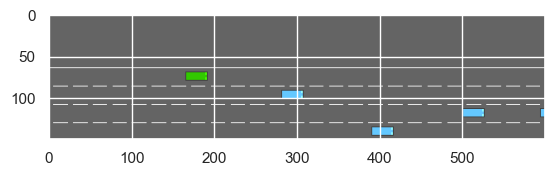

[WARNING] Preferred device cuda:best unavailable, switching to default cpu 


In [8]:
pprint.pprint(env.config)
pprint.pprint(agent_config)
env.reset()

plt.imshow(env.render(mode="rgb_array"))
plt.show()

agent = load_agent(agent_config, env)
evaluation = Evaluation(env, agent, num_episodes=800, display_env=False, display_agent=False)

In [4]:
%tensorboard --logdir "{evaluation.directory}"

UsageError: Line magic function `%tensorboard` not found.


In [9]:
evaluation.train()

[INFO] Episode 0 score: 15.5 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20221231-112827_13328\checkpoint-0.tar 
[INFO] Episode 1 score: 5.2 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20221231-112827_13328\checkpoint-1.tar 
[INFO] Episode 2 score: 22.1 
[INFO] Episode 3 score: 4.7 
[INFO] Episode 4 score: 25.9 
[INFO] Episode 5 score: 11.7 
[INFO] Episode 6 score: 24.4 
[INFO] Episode 7 score: 30.0 
[INFO] Episode 8 score: 16.7 
[INFO] Saved DQNAgent model to out\HighwayEnv\DQNAgent\run_20221231-112827_13328\checkpoint-8.tar 
[INFO] Episode 9 score: 30.0 
[INFO] Episode 10 score: 10.3 
[INFO] Episode 11 score: 8.5 
[INFO] Episode 12 score: 25.9 
[INFO] Episode 13 score: 2.6 
[INFO] Episode 14 score: 32.4 
[INFO] Episode 15 score: 5.0 
[INFO] Episode 16 score: 10.3 
[INFO] Episode 17 score: 9.4 
[INFO] Episode 18 score: 8.6 
[INFO] Episode 19 score: 10.7 
[INFO] Episode 20 score: 12.7 
[INFO] Episode 21 score: 19.7 
[INFO] Episode 22 score: 6.3 
[INFO] E

In [10]:
env.configure({"offscreen_rendering": True})
env.render(mode="rgb_array")
evaluation = Evaluation(env, agent, num_episodes=10, recover=True)
evaluation.test()

[INFO] Loaded DQNAgent model from out\HighwayEnv\DQNAgent\saved_models\latest.tar 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-0.mp4


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-0.mp4



[INFO] Episode 0 score: 10.1                                   
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-1.mp4



[INFO] Episode 1 score: 19.6                                   


Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-1.mp4


[INFO] Episode 2 score: 31.5 
[INFO] Episode 3 score: 28.7 
[INFO] Episode 4 score: 29.6 
[INFO] Episode 5 score: 8.5 
[INFO] Episode 6 score: 28.5 
INFO: Starting new video recorder writing to c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-8.mp4
[INFO] Episode 7 score: 30.7 


Moviepy - Building video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-8.mp4.
Moviepy - Writing video c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\bajs1\Documents\highway-env\scripts\out\HighwayEnv\DQNAgent\run_20221231-123928_13328\rl-video-episode-8.mp4


[INFO] Episode 8 score: 4.5 
[INFO] Episode 9 score: 31.5 
